# Adaptive Decision Trees

Using iris dataset from scikit-learn.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

from sklearn import datasets

from kdtree import KDTree

## Load + Explore Data

In [4]:
data = datasets.load_iris()
X, Y = data.data, data.target
print(data.feature_names)
print(data.target_names)
print(len(X))

['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
['setosa' 'versicolor' 'virginica']
150


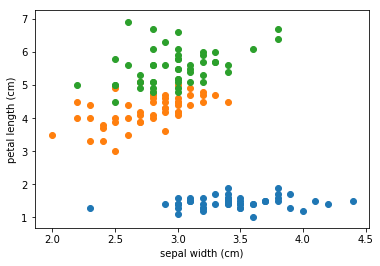

In [5]:
feat1, feat2 = (1, 2) # edit this
plt.scatter(X[Y == 0][:, feat1], X[Y == 0][:, feat2], label=data.target_names[0])
plt.scatter(X[Y == 1][:, feat1], X[Y == 1][:, feat2], label=data.target_names[1])
plt.scatter(X[Y == 2][:, feat1], X[Y == 2][:, feat2], label=data.target_names[2])
plt.xlabel(data.feature_names[feat1])
plt.ylabel(data.feature_names[feat2])
plt.show()

In [6]:
# pick 2 dimensions for easy viz
X2d = X[:, [1, 2]]
Ysmall = Y.copy()
# # blot out all but 50 labels
# mask = np.random.choice(np.arange(Y.size), size=150-50, replace=False)
# Ysmall[mask] = -1

## Evaluate kNN

In [91]:
## Evaluate k-NN
def eval_knn(k, viz=True):
    failures = []
    for idx in range(X2d.shape[0]):
        x, y = X2d[idx], Ysmall[idx]
        dists = np.linalg.norm(x - X2d, axis=1)
        neighbors = dists.argpartition(k)[:k+1]
        if idx in neighbors:
            neighbors = set(neighbors)
            neighbors.remove(idx)
            neighbors = list(neighbors)
        else:
            neighbors = neighbors[:-1]
        assert len(neighbors) == k
        labels = Ysmall[neighbors]
        pred = np.bincount(labels).argmax() # get the most numerous label among k-NN
        if pred != y:
            failures.append(x)
            
    if viz:
        tree.viz_data()
        xx, xy = zip(*failures)
        plt.scatter(xx, xy, color='black', s=300, marker='x')
        plt.show()
    
    return len(failures)

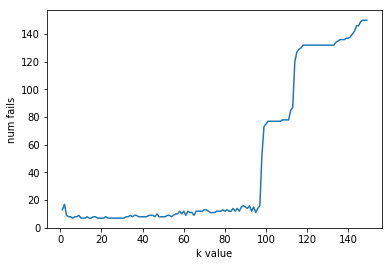

In [93]:
k_range = list(range(1, 150))
fails = []
for k in k_range:
    num_fail = eval_knn(k, viz=False)
    fails.append(num_fail)

plt.plot(k_range, fails)
plt.ylim(bottom=0)
plt.xlabel('k value')
plt.ylabel('num fails')
plt.show()

## Visualize k-D Trees

In [10]:
tree = KDTree(X2d, Ysmall, feat_names=data.feature_names, tgt_names=data.target_names)

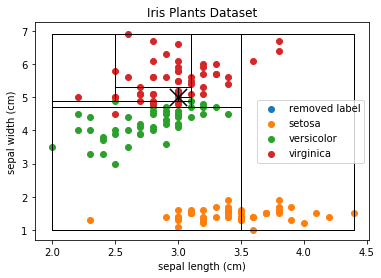

In [11]:
# visualize sequence of specialists for a single point
# dimensions will appear to not alternate when the same coordinate position is selected twice.
fig, ax = plt.subplots()
tree.viz_data()
tree.viz_point(np.array([3, 5]), ax)
plt.show()

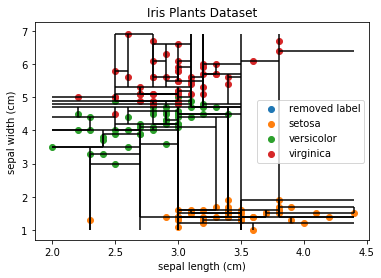

In [12]:
# visualize full tree
fig, ax = plt.subplots()
tree.viz_data()
tree.viz_tree()
plt.show()

In [ ]:
# tree = sp.spatial.KDTree(X2d)